In [1]:
import matplotlib.font_manager
from IPython.core.display import HTML
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import random 
import csv
from IPython.display import display, Math
from numpy import unravel_index
from astropy.io import fits
from astropy.table import Table, vstack
import matplotlib.colors
from scipy.optimize import curve_fit
from matplotlib.colors import LinearSegmentedColormap

def make_html(fontname):
    return "<p>{font}: <span style='font-family:{font}; font-size: 24px;'>{font}</p>".format(font=fontname)

code = "\n".join([make_html(font) for font in sorted(set([f.name for f in matplotlib.font_manager.fontManager.ttflist]))])

HTML("<div style='column-count: 2;'>{}</div>".format(code))

plt.rcParams["font.family"] = "TeX Gyre Schola Math"

print("Comparison")

Comparison


In [2]:
def Convert(List):
    #___ Description_____________________________________________________________________________________
    #Arguments:: just a list of shape 4*1: [alpha, alpha_unc, delta, delta_unc], all in µas/yr
    #Returns:: same list but with its elements converted into km/s
    #____________________________________________________________________________________________________
    Result = []
    for value in List:
        Result.append(value*3.6907659441782648)

    return Result

In [26]:
def Plot(ListsOfValues):
    plt.figure(figsize=(8, 8))
    
    Colors = ['#B5750A', '#', '#', '#', '#B51F0A', "#00688B", "#00688B", "gray"]
    
    for i in range(len(ListsOfValues)):
        plt.errorbar(ListsOfValues[i][0], ListsOfValues[i][2], ListsOfValues[i][3], ListsOfValues[i][1],
                 '-o', color=ListsOfValues[i][5], ecolor=ListsOfValues[i][5], barsabove=True, capsize=3, label=ListsOfValues[i][4])

    plt.legend()
    plt.xticks(fontsize = 15)
    plt.yticks(fontsize = 15)
    plt.xlabel(r'$v_{\alpha}$ (km.s$^{-1}$)', fontname = 'Serif', size = 19)
    plt.ylabel(r'$v_{\delta}$ (km.s$^{-1}$)', fontname = 'Serif', size = 19)
    plt.gca().invert_xaxis()
    plt.show()

In [29]:
vdM_08 = [78, 41, -38, 34]
vdM_08.append("vdM08")
vdM_08.append("#B5750A")

S_12   = Convert([42.2, 12.3, -30.9, 11.7])
S_12.append("Sohn12")
S_12.append("#750AB5")

vdM_19 = Convert([65, 18, -57, 15])
vdM_19.append("vdM19")
vdM_19.append("#B50AA0")

s_21_B = [159.8, 20.7, -111.2, 17.4]
s_21_B.append("Salomon21 blue")
s_21_B.append("#0D4F8B")
s_21_R = [134.8, 29.9, -293.6, 25.2]
s_21_R.append("Salomon21 red")
s_21_R.append("#660000")

a_23_B = Convert([46.1, 10.0, -25.8, 8.4])
a_23_B.append("Gaia DR3 blue")
a_23_B.append("#00008B")
a_23_R = Convert([41.6, 12.8, -72.8, 10.5]) 
a_23_R.append("Gaia DR3 red")
a_23_R.append("#cc0000")

#My result without the quadrants
l_23_B = Convert([43.9, 5.1, -27.6, 4.1])
l_23_B.append("Gaia DR3 blue (all *)")
l_23_B.append("#00008B")
l_23_R = Convert([41.8, 6.1, -72.6, 5.1])
l_23_R.append("Gaia DR3 red (all *)")
l_23_R.append("#cc0000")

#Correcting for the QSOs
S_21_B = [178.7, 38.1, -142.7, 28.9]
S_21_B.append("Salomon21 blue")
S_21_B.append("#0D4F8B")
S_21_R = [153.7, 43.8, -325.1, 34.2]
S_21_R.append("Salomon21 red")
S_21_R.append("#660000")

A_23_B = Convert([44.4, 12., -32.9, 10.])
A_23_B.append("Gaia DR3 blue")
A_23_B.append("#00008B")
A_23_R = Convert([40.0, 14.4, -79.7, 11.8])
A_23_R.append("Gaia DR3 red")
A_23_R.append("#cc0000")

## In the Gaia frame 

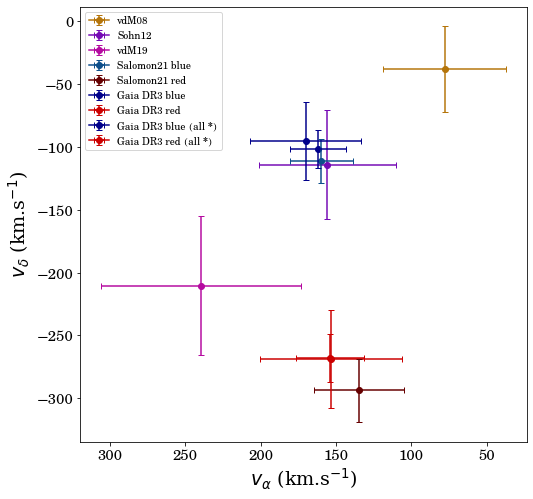

In [32]:
Plot([vdM_08, S_12, vdM_19, s_21_B, s_21_R, a_23_B, a_23_R, l_23_B, l_23_R])

## Corrected for apparent QSO motion

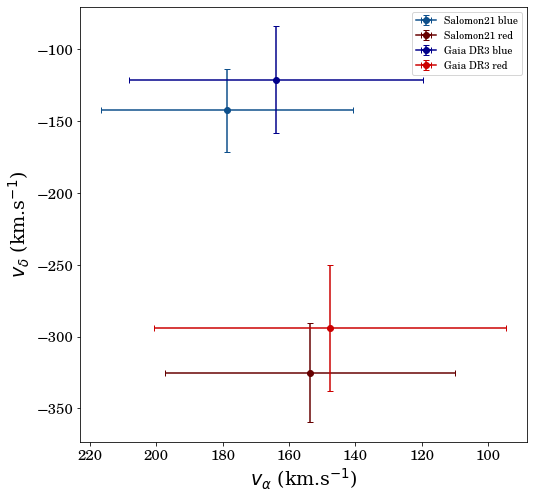

In [31]:
Plot([S_21_B, S_21_R, A_23_B, A_23_R])